In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df =  pd.read_csv('https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/wtageinf.csv')
df[:10]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


[]

<Figure size 1440x864 with 0 Axes>

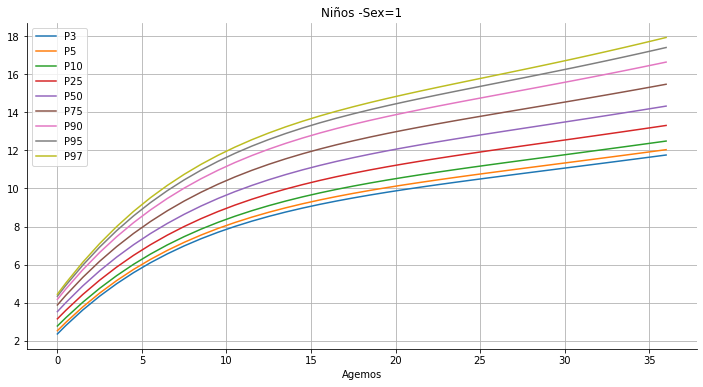

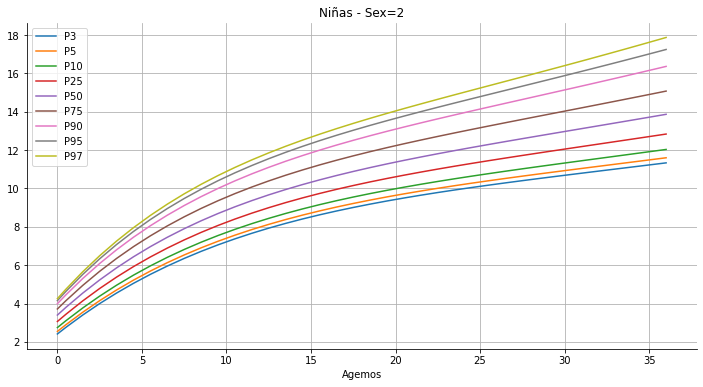

In [ ]:
#df[df.Sex==1].plot(x='Agemos', y=['L', 'M','S','P3'], figsize=(10,5), grid = True)
plt.figure(figsize=(20,12))

df[df.Sex==1].plot(x='Agemos', y=['P3','P5','P10','P25','P50','P75','P90','P95','P97'], figsize=(12,6), grid=True)
plt.title("Niños -Sex=1")
sns.despine()

df[df.Sex==2].plot(x='Agemos', y=['P3','P5','P10','P25','P50','P75','P90','P95','P97'], figsize=(12,6), grid=True)
plt.title("Niñas - Sex=2")
sns.despine()
plt.plot()


In [ ]:
df_json =  pd.read_json('https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json')

In [ ]:

df_json_g=df_json.groupby("province").count().reset_index()
df_json_g

,province,location,name
0,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...,1,1
1,Buenos Aires,48,48
2,Catamarca,3,3
3,Chaco,3,3
4,Chubut,15,15
5,Cordoba,3,3
6,Corrientes,15,15
7,Córdoba,1,1
8,Entre Rios,13,13
9,Formosa,11,11


<Figure size 864x432 with 0 Axes>

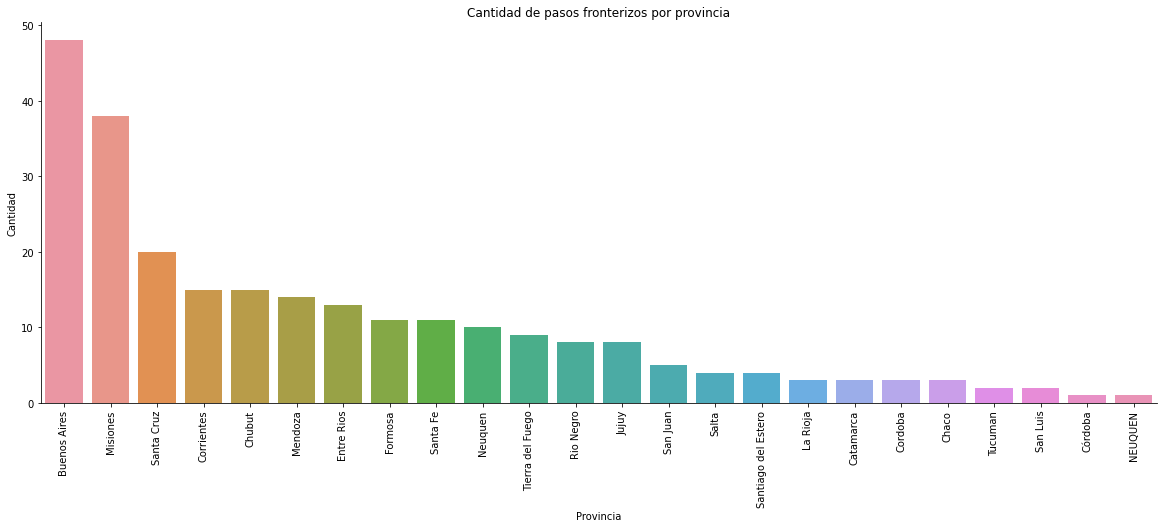

<Figure size 864x432 with 0 Axes>

In [ ]:

df_grp = df_grp.sort_values("location",axis=0, ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(y="location", x="province", data=df_grp)
plt.xticks(rotation=90)
sns.despine()
plt.title("Cantidad de pasos fronterizos por provincia")
plt.ylabel('Cantidad')
plt.xlabel('Provincia', rotation=0)
plt.figure(figsize=(12,6))



Text(0.5, 0, 'Cantidad')

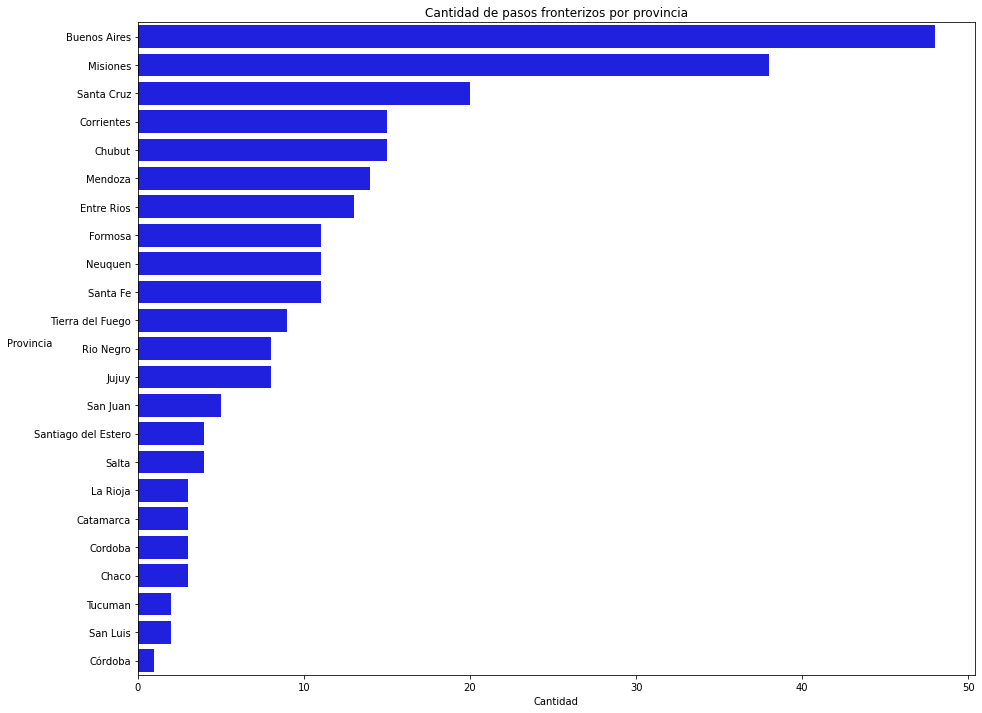

In [ ]:
#eliminamos los datos que no correspoonden 
df_json = df_json.drop(df_json[df_json.province.str.contains('AEROPUERTO INTERNACIONAL')].index).reset_index(drop=True)
# opodemos cambiar su monbre
df_json[df_json["province"].str.contains("NEUQUEN")] = 'Neuquen'

plt.figure(figsize=(15,12))
df_grp = df_json.groupby('province').count().reset_index()
df_grp = df_grp.sort_values("location",axis=0, ascending=False)
sns.barplot(x="location", y="province", data=df_grp, color='blue')
plt.title("Cantidad de pasos fronterizos por provincia")
plt.ylabel('Provincia', rotation=0)
plt.xlabel('Cantidad')
